# Clustering: K-Means

In [ ]:
# Ambil data yang sudah dibersihkan
data_dir = '/content/drive/MyDrive/BAI/heart disease dataset/Clean_Heart_Failure_Prediction.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(data_dir)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,1,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_Normal  918 non-null    int64  
 12  RestingECG_ST      918 non-null    int64  
 13  ExerciseAngina_Y   918 non-null    int64  
 14  ST_Slope_Flat      918 non-null    int64  
 15  ST_Slope_Up        918 non-null    int64  
dtypes: float64(5), int64(11)
m

In [ ]:
#Pisahkan data label
features = [label for label in df if label not in "HeartDisease"]

In [ ]:
features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [ ]:
data = df[features]
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0,0.507042,0.431818,1,0,0,1,1,0,0,1,0
914,0.816327,0.72,0.320066,1,0.570423,0.681818,1,0,0,0,1,0,0,1,0
915,0.591837,0.65,0.217247,0,0.387324,0.431818,1,0,0,0,1,0,1,1,0
916,0.591837,0.65,0.391376,0,0.802817,0.295455,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, accuracy_score



In [ ]:
# Mencari jumlah cluster
def k_means_cluster(data, max_cluster):
  K = []
  SSE =[]
  for cluster in range(1, max_cluster+1):
    kmeans= KMeans(cluster, n_init=10)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)
    K.append(cluster)

  return K, SSE

In [ ]:
K, SSE = k_means_cluster(data, 10)

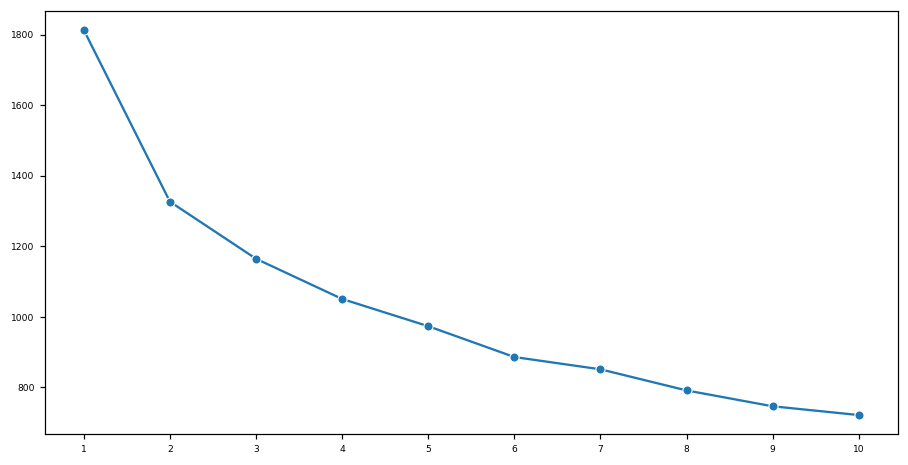

In [ ]:
with plt.rc_context(rc={'figure.dpi': 110, 'axes.labelsize': 8, 'xtick.labelsize': 6, 'ytick.labelsize': 6}):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(x=K, y=SSE, marker='o')
    plt.xticks(range(1, 11))
    plt.show()


Dapat dilihat, apabila menggunakan metode elbow untuk menentukan jumlah cluster, elbow tersebut cukup ambigu. Dengan demikian, penulis mengunakan cluster sebanyak 2 sesuai dengan label pada data sebenarnya

In [ ]:
# Menggunakan cluster 2

k = 2
kmeans = KMeans(k, n_init=100)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
labels

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

In [ ]:
centroids

array([[5.64267812e-01, 6.70292398e-01, 3.14897249e-01, 2.94346979e-01,
        4.77486753e-01, 4.42185008e-01, 8.47953216e-01, 6.23781676e-02,
        1.85185185e-01, 4.87329435e-02, 5.67251462e-01, 2.16374269e-01,
        6.10136452e-01, 8.96686160e-01, 1.22124533e-15],
       [4.65356513e-01, 6.51456790e-01, 3.48414307e-01, 1.55555556e-01,
        6.21248479e-01, 3.38159371e-01, 7.16049383e-01, 3.48148148e-01,
        2.66666667e-01, 5.18518519e-02, 6.44444444e-01, 1.65432099e-01,
        1.43209877e-01, 6.66133815e-16, 9.75308642e-01]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


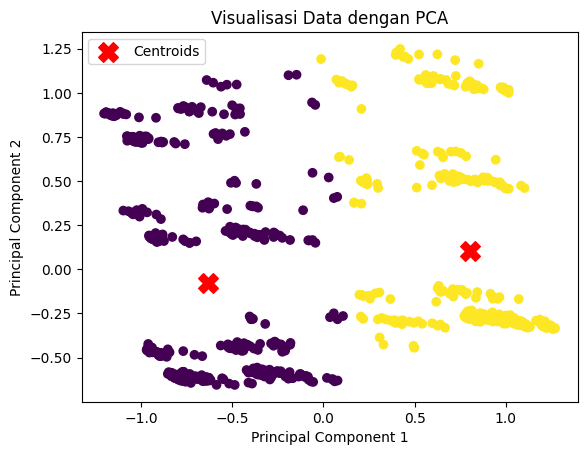

In [ ]:
# Visualisasi
# Karena fitur termasuk high dimensional, sehingga digunakan metode PCA dan menjadikannya dua dimensi


pca = PCA(n_components=2)  # Ganti 2
reduced_data = pca.fit_transform(data)

# Plot data points
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')

# Plot centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('Visualisasi Data dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



In [ ]:
# Hitung ARI
ari = adjusted_rand_score(df['HeartDisease'], labels)

# Hitung NMI
nmi = normalized_mutual_info_score(df['HeartDisease'], labels)

# Hitung accuracy
acc = accuracy_score(df['HeartDisease'],labels)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Accuracy: {acc}')


Adjusted Rand Index (ARI): 0.398447266488629
Normalized Mutual Information (NMI): 0.30688151029255584
Accuracy: 0.1840958605664488


Seperti yang terlihat pada metriks yang didapatkan, baik ARI, NMI, maupun ACC nilainya sangat rendah. Dengan demikian, dapat disimpulkan bahwa metode clustering pada kasus ini tidak dapat merepresentasikan pasien yang memiliki resiko gagal jantung atau tidak.

In [ ]:
# Akurasi sangat kecil, kemungkinan labelnya kebalik

In [ ]:
# Membalikkan variabel labels
inverted_labels = [1 if label == 0 else 0 for label in labels]

# Hitung ARI
ari = adjusted_rand_score(df['HeartDisease'], inverted_labels)

# Hitung NMI
nmi = normalized_mutual_info_score(df['HeartDisease'], inverted_labels)

# Hitung accuracy
acc = accuracy_score(df['HeartDisease'],inverted_labels)

print(f'Adjusted Rand Index (ARI): {ari}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Accuracy: {acc}')


Adjusted Rand Index (ARI): 0.398447266488629
Normalized Mutual Information (NMI): 0.30688151029255584
Accuracy: 0.8159041394335512


<Axes: >

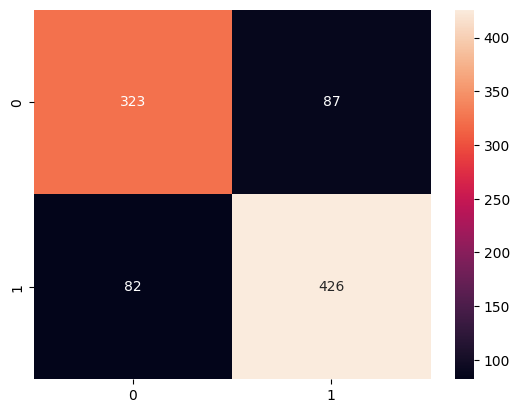

In [ ]:

from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(df['HeartDisease'], inverted_labels)
sns.heatmap(ann_cm,fmt='',annot=True)

# Dengan data training dan data validasi

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8)

In [ ]:
# Menggunakan cluster 2

k = 2
kmeans = KMeans(k, n_init=100)
kmeans.fit(X_train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
labels

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
accuracy_score(y_train,labels)

0.8079019073569482

In [ ]:
#predict dengan data baru
labels_val = kmeans.predict(X_val)

In [ ]:
accuracy_score(y_val,labels_val)

0.8478260869565217

<Axes: >

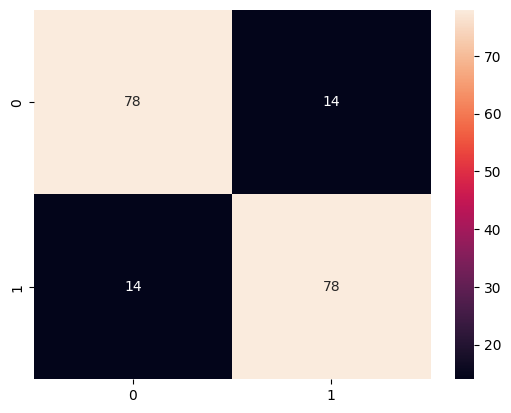

In [ ]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_val, labels_val)
sns.heatmap(ann_cm,fmt='',annot=True)